# 01. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\Josh Abrams\Desktop\CF_CAPSTONE'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data','Prepared Data','King Data Clean.csv'))

In [5]:
df.shape

(21613, 25)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,...,0,1955,0,98101,SEATTLE,WA,47.5112,-122.257,1340,5650
1,1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,...,400,1951,1991,98101,SEATTLE,WA,47.7210,-122.319,1690,7639
2,2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,...,0,1933,0,98028,KENMORE,WA,47.7379,-122.233,2720,8062
3,3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,...,910,1965,0,98101,SEATTLE,WA,47.5208,-122.393,1360,5000
4,4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,...,0,1987,0,98074,SAMMAMISH,WA,47.6168,-122.045,1800,7503


In [7]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [8]:
df.head()

,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98101,SEATTLE,WA,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98101,SEATTLE,WA,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,KENMORE,WA,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98101,SEATTLE,WA,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,SAMMAMISH,WA,47.6168,-122.045,1800,7503


In [9]:
# Convert the index to a DatetimeIndex
df.index = pd.to_datetime(df.index)

In [10]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)


In [11]:
# Aggregate the data by month
monthly_data = df.resample('M').mean()

In [12]:
# Creating a new dataframe with median housing prices grouped by dates

monthly_data = df.groupby('date').agg({'sale_price': ['median']})

In [13]:
# Checking headers

monthly_data.head()

,sale_price
,median
date,
2014-05-02,445700.0
2014-05-03,466440.0
2014-05-04,628000.0
2014-05-05,536062.5
2014-05-06,483500.0


In [14]:
# Checking data types

monthly_data.dtypes

sale_price  median    float64
dtype: object

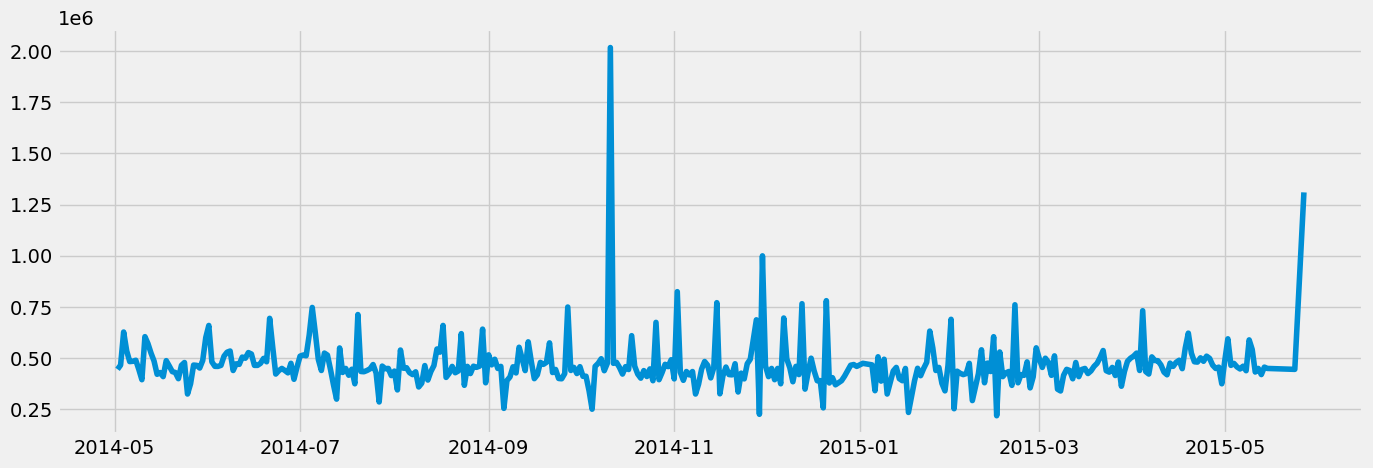

In [15]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(monthly_data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [16]:
# Reset index so that you can use the "Date" column as a filter

monthly_data_2 = monthly_data.reset_index()

In [17]:
monthly_data_2.head()

,date,sale_price
,,median
0,2014-05-02,445700.0
1,2014-05-03,466440.0
2,2014-05-04,628000.0
3,2014-05-05,536062.5
4,2014-05-06,483500.0


In [18]:
monthly_data_sub = monthly_data_2.loc[(monthly_data_2['date'] >= '2013-12-31') & (monthly_data_2['date'] < '2016-01-01')]

In [19]:
monthly_data_sub.shape

(372, 2)

In [20]:
# Set the "Date" column as the index

from datetime import datetime

monthly_data_sub['datetime'] = pd.to_datetime(monthly_data_sub['date']) # Create a datetime column from "Date.""
monthly_data_sub = monthly_data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
monthly_data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
monthly_data_sub.head()

,sale_price
,median
datetime,
2014-05-02,445700.0
2014-05-03,466440.0
2014-05-04,628000.0
2014-05-05,536062.5
2014-05-06,483500.0


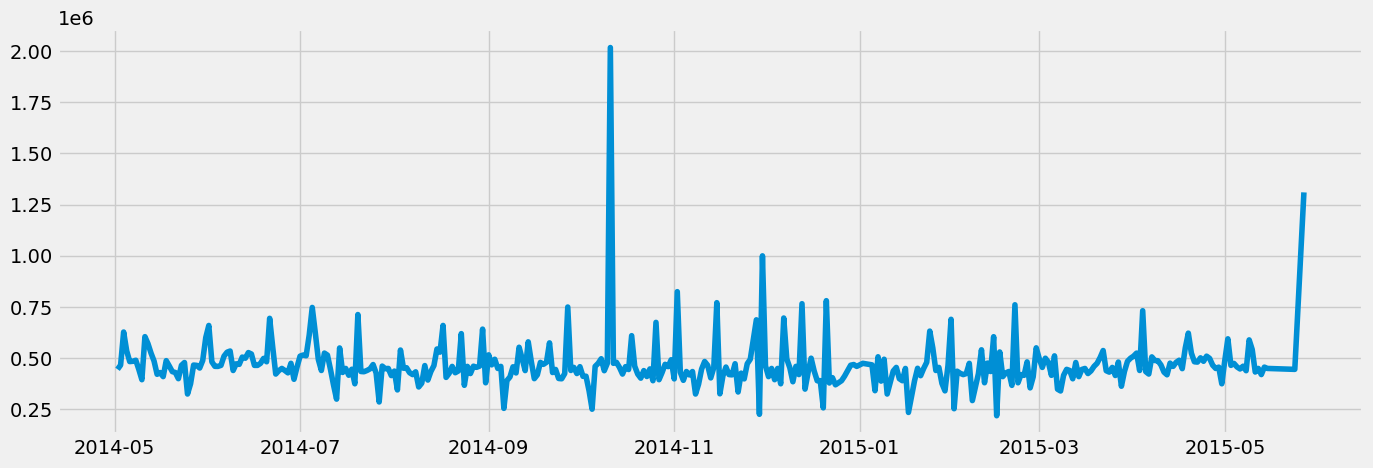

In [21]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(monthly_data_sub)

In [22]:
# Check for missing values (you shouldn't have any)

monthly_data_sub.isnull().sum() 

sale_price  median    0
dtype: int64

In [23]:
# Check for duplicates

dups = monthly_data_sub.duplicated()
dups.sum()



114

In [24]:
monthly_data_sub = monthly_data_sub.drop_duplicates()

In [25]:
# Check for duplicates

dups = monthly_data_sub.duplicated()
dups.sum()


0

# 04. Decomposing Time-Series Data

In [26]:
# Decompose the time series using an additive model

decomp= sm.tsa.seasonal_decompose(monthly_data_sub, model='additive', period=12)

In [27]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

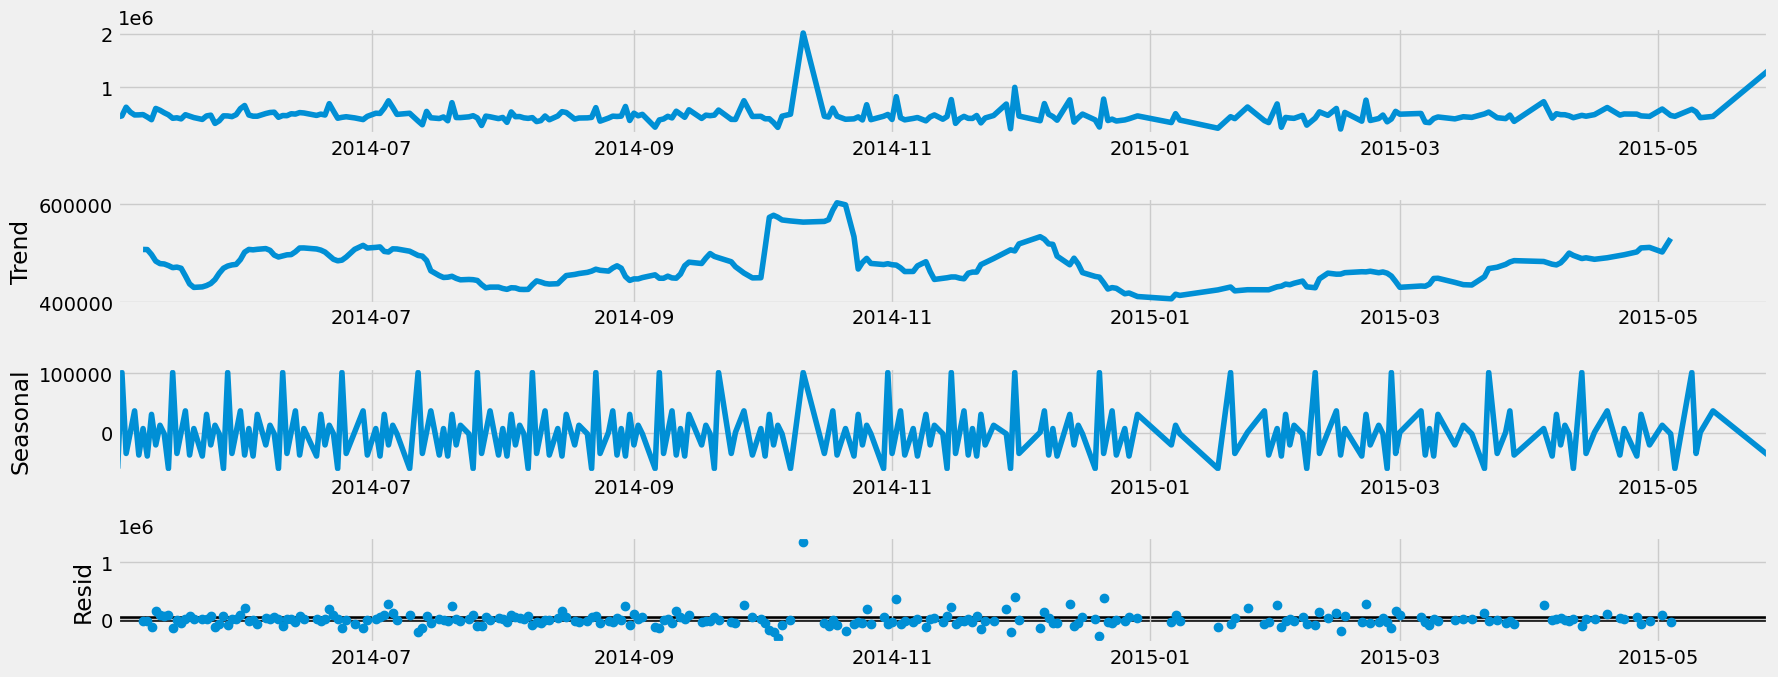

In [28]:
# Plotting decomposition of time-series data

decomp.plot()
plt.show()

In [ ]:
# Export Time Series Data

The decomposition clearly shows an upward trend of the median price of sold homes in Washington State. The first two charts are appear different due to the data being unsmoothed.

The plot shows seasonality due to a pattern repeating itself at the same time each year. House purchasing activity picks up in March and starts to gradually decline. There is a slight peak in October and a bigger peak in December, most likely due to it being the holiday season. The activity starts to decline again after December.  

There appears to be some noise from due to data fluctuations.

# 05. Stationarity Test

### a. Dickey-Fuller Test

It is vital data is stationary, otherwise, we will not have a reliable basis to build the forecasting on. The presence of a data trend implies the data is non-stationary. A Dickey-Fuller test will be conducted to check for stationarity.

In [29]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(monthly_data_sub['sale_price'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.608808e+01
p-value                        5.289624e-29
Number of Lags Used            0.000000e+00
Number of Observations Used    2.570000e+02
Critical Value (1%)           -3.456054e+00
Critical Value (5%)           -2.872853e+00
Critical Value (10%)          -2.572799e+00
dtype: float64


#### H0 = Presence of a unit root (non-stationary)  
#### HA = Unit root present (stationary)  

The test statistic of  -1.608808e+01 is larger than the critical value (5%) of-2.872853e+00, meaning the null hypothesis cannot be rejected. The result is also not significant as the p-value is more than 0.05.

### b. Autocorrelation Test

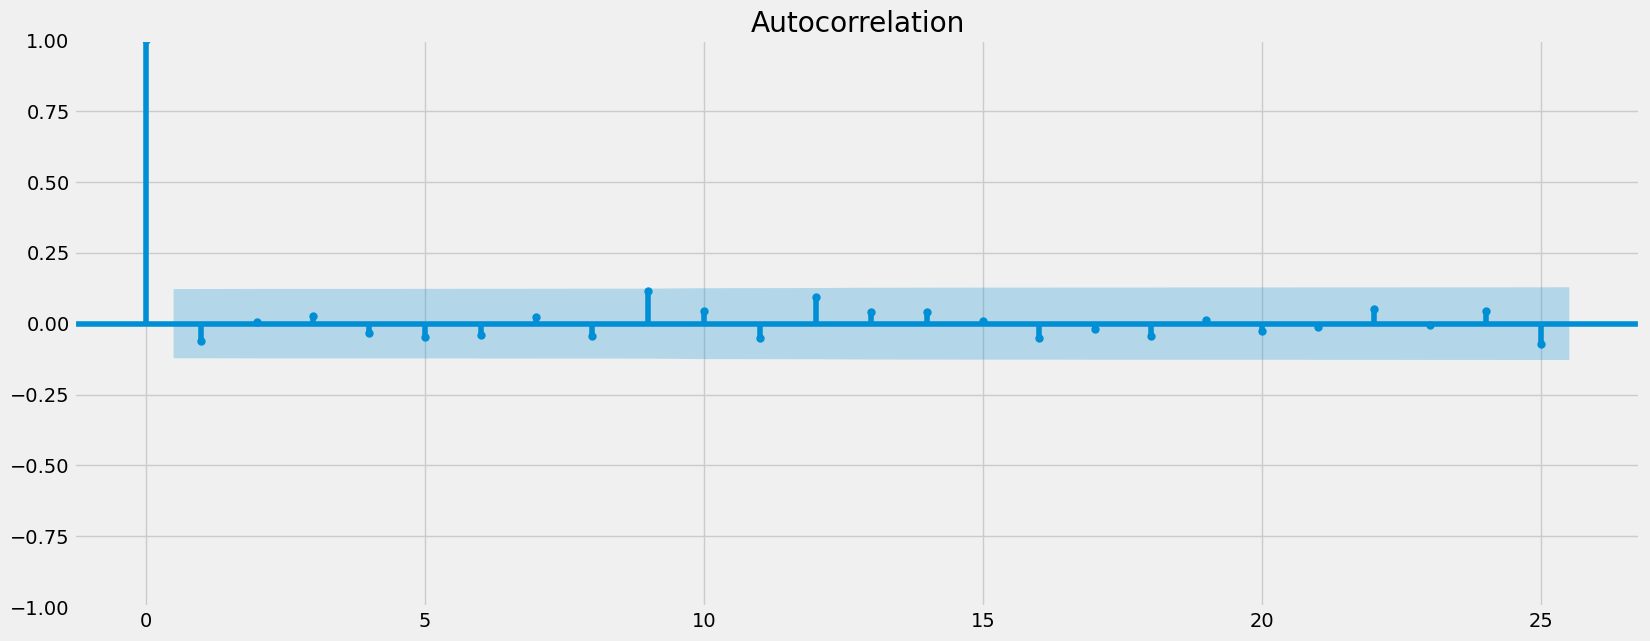

In [30]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_data_sub)
plt.show()

The test shows that there are vertical lines that go above the blue edge of the confidence interval, indicating that the lags are not significantly correlated with each other and the data is stationary.

# 06. Stationarizing Data

In [31]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = monthly_data_sub -monthly_data_sub.shift(1)

In [32]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [33]:
# Checking values and headers

data_diff.head()

,sale_price
,median
datetime,
2014-05-03,20740.0
2014-05-04,161560.0
2014-05-05,-91937.5
2014-05-06,-52562.5
2014-05-07,1500.0


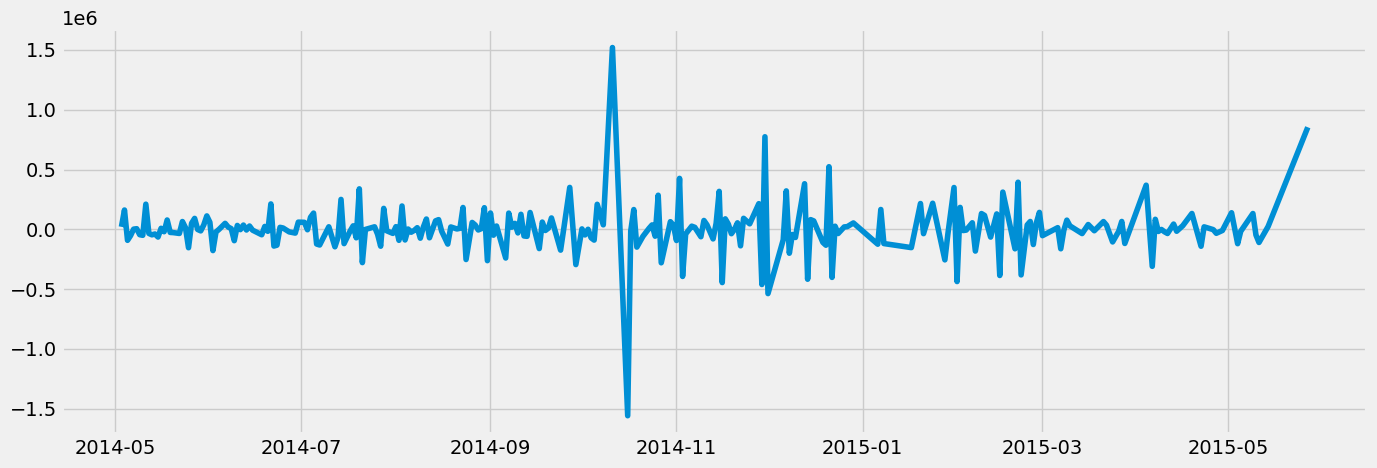

In [34]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [35]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.075271e+00
p-value                        1.511410e-12
Number of Lags Used            1.200000e+01
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


 -8.075271, which is less than the critical value of -2.873459 at the 5% level of significance. This means that we can reject the null hypothesis and conclude that the time series is stationary.

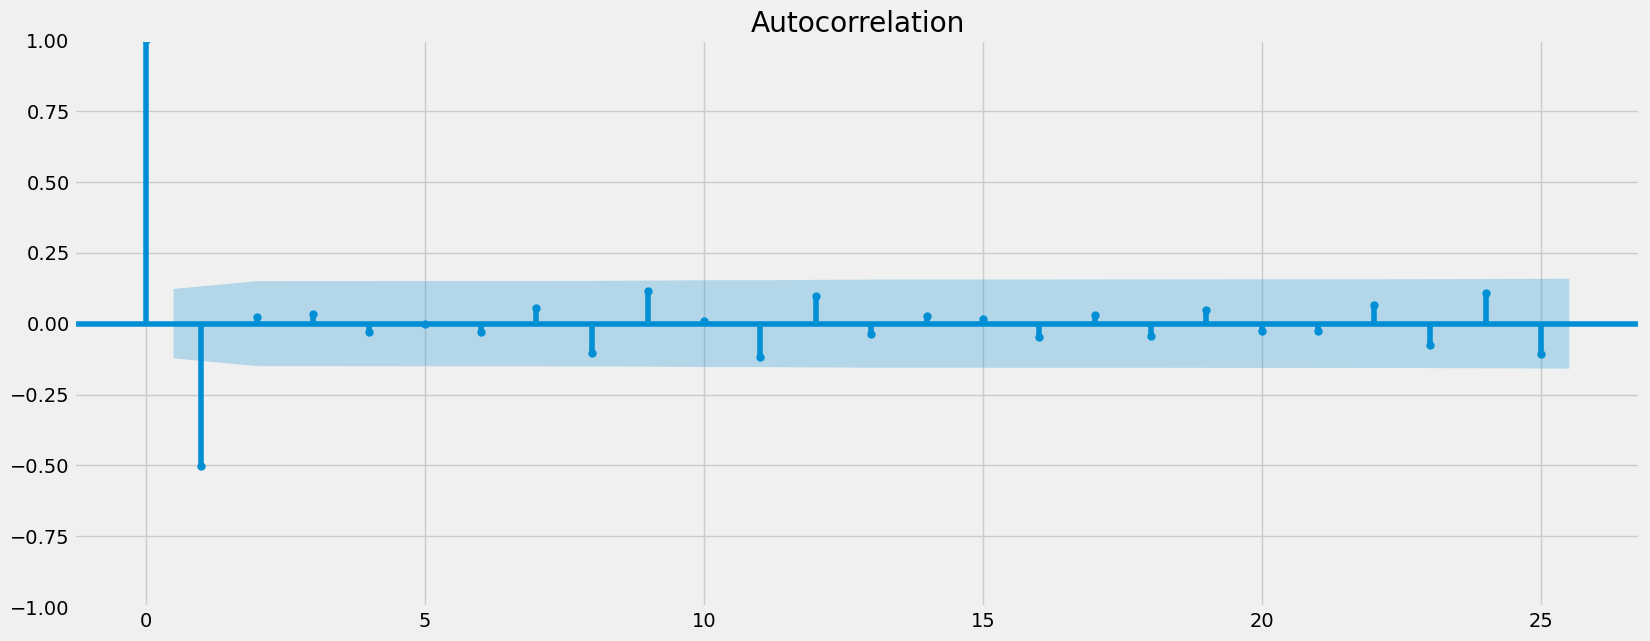

In [36]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

The autocorrelation plot has seemd to improved. The stationary is strong due to no vertical lines going above the confidence interval.